# Basis function

/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/278171054.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ks

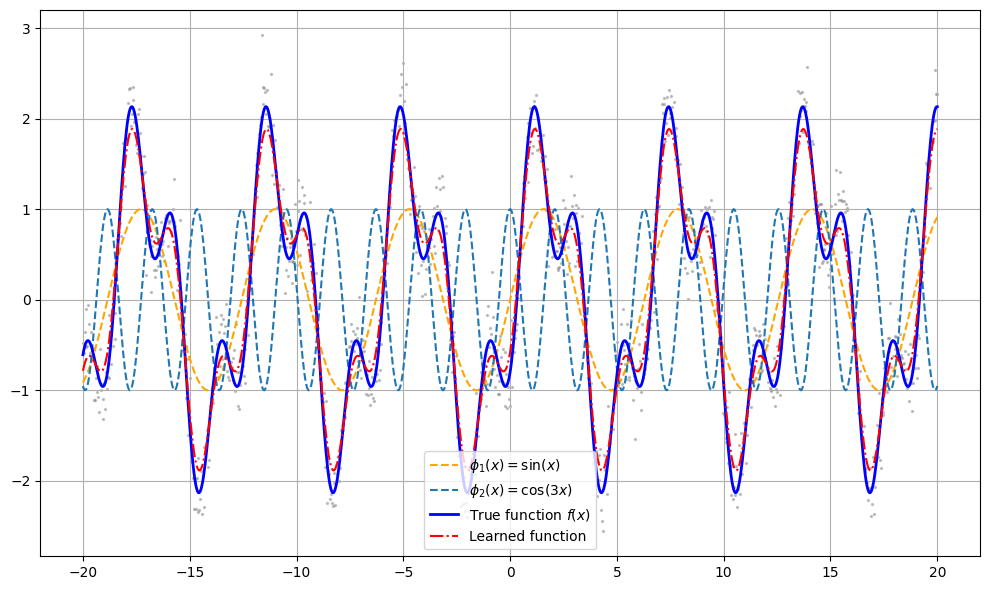

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fix seed
np.random.seed(42)

# Input values
x = np.linspace(-20, 20, 1000).reshape(-1, 1)

# Define two complex basis functions
def phi_1(x): return np.sin(x)
def phi_2(x): return np.cos(3 * x)

# True weights for linear combination
w_true = np.array([1.5, -0.8])

# True function (target): linear combination of phi_1 and phi_2
f1 = phi_1(x)
f2 = phi_2(x)
f_true = w_true[0] * f1 + w_true[1] * f2
y = f_true.ravel()

# Add noise
y_noisy = y + np.random.normal(0, 0.25, size=y.shape)

# Create design matrix
X_basis = np.hstack([f1, f2])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_basis, y_noisy, test_size=0.2, random_state=42)

# Train the model (just right)
def train(X_train, y_train, X_test, y_test, epochs=200, lr=0.01):
    w = np.random.randn(2)
    train_losses, test_losses = [], []

    for _ in range(epochs):
        y_pred_train = X_train @ w
        y_pred_test = X_test @ w
        train_losses.append(mean_squared_error(y_train, y_pred_train))
        test_losses.append(mean_squared_error(y_test, y_pred_test))
        grad = 2 * X_train.T @ (y_pred_train - y_train) / len(y_train)
        w -= lr * grad

    return w, train_losses, test_losses

w_learned, _, _ = train(X_train, y_train, X_test, y_test)

# Predict full learned function
f_learned = X_basis @ w_learned

# === Plot all components ===
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$\phi_1(x) = \sin(x)$", linestyle="--", color="orange")
plt.plot(x, f2, label=r"$\phi_2(x) = \cos(3x)$", linestyle="--")
plt.plot(x, y, label="True function $f(x)$", color="blue", linewidth=2)
plt.plot(x, f_learned, label="Learned function", color="red", linestyle="-.")

plt.scatter(x, y_noisy, color="gray", s=2, alpha=0.4)
plt.legend(loc="lower center")
plt.grid(True)
plt.tight_layout()
plt.savefig("1_ml_pdf/basis_function_decomposition.pdf")
plt.show()

# Overfitting, underfitting

In [48]:
configs = {
    "underfit": {"epochs": 50, "lr": 0.001},
    "just_right": {"epochs": 200, "lr": 0.005},
    "overfit": {"epochs": 1000, "lr": 0.01}
}

results = {}

for name, cfg in configs.items():
    w, train_losses, test_losses = train(X_train, y_train, X_test, y_test, **cfg)
    results[name] = {
        "weights": w,
        "train_loss": train_losses,
        "test_loss": test_losses,
        "pred": X_basis @ w
    }

/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ks

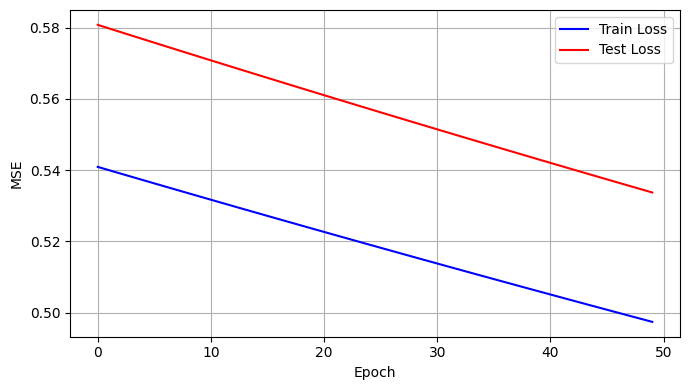

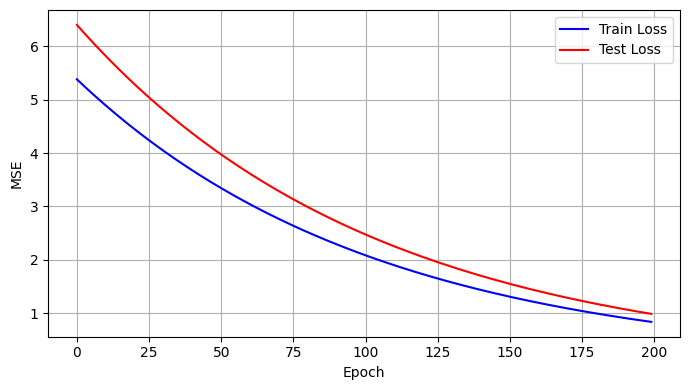

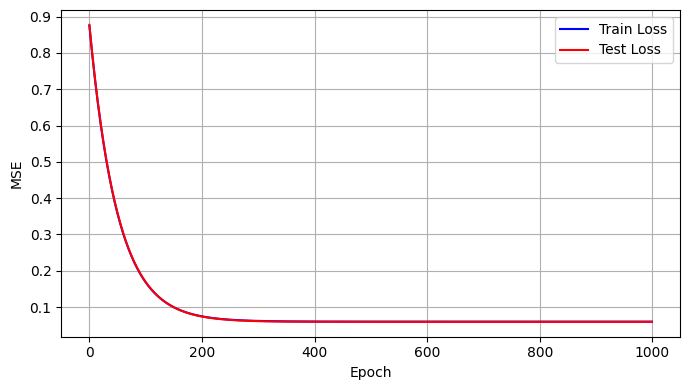

In [ ]:
for name in ["underfit", "just_right", "overfit"]:
    plt.figure(figsize=(7, 4))
    plt.plot(results[name]["train_loss"], label="Train Loss", color="blue")
    plt.plot(results[name]["test_loss"], label="Test Loss", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"1_ML_pdf/basis_loss_{name}.pdf")
    plt.show()